<a href="https://colab.research.google.com/github/AndresLAraque/Data-Science/blob/main/ParcialReenvio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“Al entregar la solución de este examen, yo, **Andres Leonardo Araque Mojica** con código **201811287** me comprometo a no conversar durante el desarrollo de este examen con ninguna persona diferente a los profesores del curso sobre aspectos relacionados con el examen; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del examen antes de entregarlo. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este examen”.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import json
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
import statsmodels.api as sm
from pandas_profiling import ProfileReport
from scipy.stats import ttest_ind
import plotly.express as px
import missingno as msno
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JupyterLabs/ParcialFinal/presion_sistolica.csv', sep=';')
dpru = df
df

,id,tazas_cafe,edad,genero,fumador,imc,tc,etnicidad,presion_sis
0,63120,2.0,27.0,Masculino,0,35.600,164.540130,0,136.57
1,42957,1.0,69.0,Femenino,0,23.980,169.683363,0,116.48
2,39221,2.0,40.0,Femenino,0,22.610,113.783536,1,118.85
3,42621,1.0,NaN,Masculino,1,39.995,210.724015,1,139.42
4,26234,2.0,42.0,Masculino,0,35.860,162.950980,1,124.94
...,...,...,...,...,...,...,...,...,...
102510,26606,2.0,29.0,Femenino,0,30.360,192.903601,0,117.59
102511,55272,0.0,25.0,Femenino,0,37.145,169.972908,2,99.29
102512,26363,2.0,36.0,Masculino,0,32.900,173.918255,0,133.03
102513,7241,4.0,21.0,Femenino,1,27.830,191.830571,0,123.17


In [ ]:
df.dtypes # df.shape

id               int64
tazas_cafe     float64
edad           float64
genero          object
fumador          int64
imc            float64
tc             float64
etnicidad        int64
presion_sis    float64
dtype: object

In [ ]:
df.describe()  #df.info


,id,tazas_cafe,edad,fumador,imc,tc,etnicidad,presion_sis
count,102515.000000,102515.000000,95473.000000,102515.000000,98704.00000,102515.000000,102515.00000,102515.000000
mean,49910.773097,2.171868,33.539176,0.169565,30.71084,160.914790,0.70498,118.461531
std,28957.773177,1.726661,8.780519,0.375252,6.10932,40.933905,0.78287,13.362846
min,3.000000,0.000000,18.000000,0.000000,15.96000,0.000000,0.00000,62.420000
25%,24755.000000,1.000000,27.000000,0.000000,26.31500,146.460795,0.00000,109.390000
50%,49801.000000,2.000000,33.000000,0.000000,30.40000,165.486068,1.00000,118.390000
75%,75070.000000,3.000000,39.000000,0.000000,34.80000,184.227631,1.00000,127.480000
max,99996.000000,6.000000,77.000000,1.000000,53.13000,283.054313,2.00000,175.150000


**1. [10%] Describa el resultado de la exploración de datos (distribuciones de una variable) e indique el tipo de cada variable (categórica ordinal, categórica nominal, cuantitativa).**

El dataset tiene 9 variables, donde entre las varialbes predictoras hay 6 variables numericas y 3 categoricas que son la etnicidad, genero y fumador, para este analisis se selecciona como variable objetivo las presion_sis, el dataset tiene un tamaño de 102515 filas × 9 columnas y presenta algunos datos faltantes. 

In [ ]:
df.duplicated().any() 

True

In [ ]:
df.duplicated().sum() 

38451

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isna().sum()/len(df) # Buscando datos faltantes

id             0.000000
tazas_cafe     0.000000
edad           0.068260
genero         0.000000
fumador        0.000000
imc            0.037291
tc             0.000000
etnicidad      0.000000
presion_sis    0.000000
dtype: float64

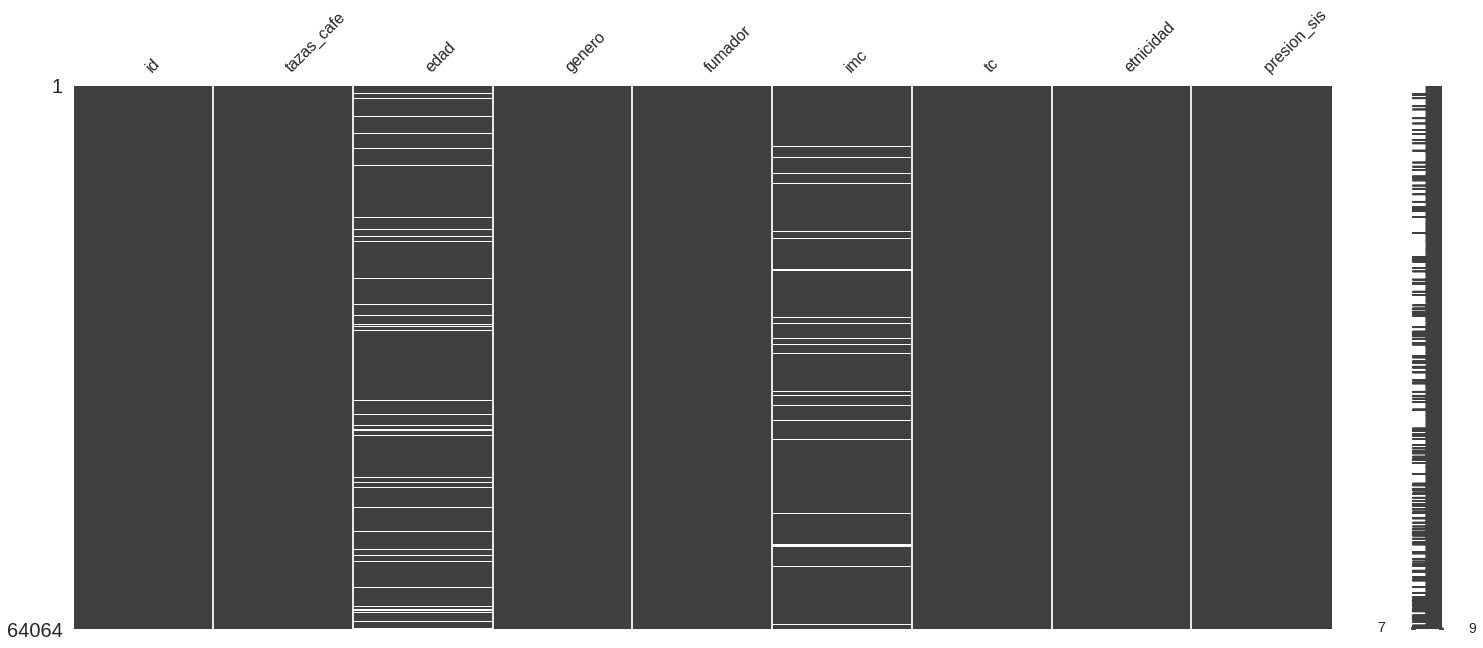

In [ ]:
msno.matrix(df.sort_values(by='presion_sis'))

In [ ]:
fig = px.histogram(df, x="edad")
fig.show()

In [ ]:
fig = px.histogram(df, x="imc")
fig.show()

In [ ]:
df['edad']=df["edad"].replace(np.nan, df["edad"].mean())
df['imc']=df["imc"].replace(np.nan, df["imc"].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**2. [10%] Describa los problemas de calidad de los datos (datos faltantes, datos duplicados) y su estrategia para corregirlos. Indique si existe algún patrón en los datos faltantes. Puede usar la librería missingno de Python.**

El dataset tiene una buena cantidad de datos representativos para este fin, presenta algunos registros repetidos o duplicados y existen valores faltantes, de acuerdo la distribucion anterior es facil identificar que las categorias de imc y edad presentan datos faltantes y es necesario imputar, para ello se seleciono la media para la edad y la mediana para el imc debido la distancia de sus colas

In [ ]:
df.isna().sum()/len(df)

id             0.0
tazas_cafe     0.0
edad           0.0
genero         0.0
fumador        0.0
imc            0.0
tc             0.0
etnicidad      0.0
presion_sis    0.0
dtype: float64

In [ ]:
df.head()

,id,tazas_cafe,edad,genero,fumador,imc,tc,etnicidad,presion_sis
0,63120,2.0,27.000000,Masculino,0,35.600,164.540130,0,136.57
1,42957,1.0,69.000000,Femenino,0,23.980,169.683363,0,116.48
2,39221,2.0,40.000000,Femenino,0,22.610,113.783536,1,118.85
3,42621,1.0,33.567614,Masculino,1,39.995,210.724015,1,139.42
4,26234,2.0,42.000000,Masculino,0,35.860,162.950980,1,124.94


In [ ]:
df.shape

(64064, 9)

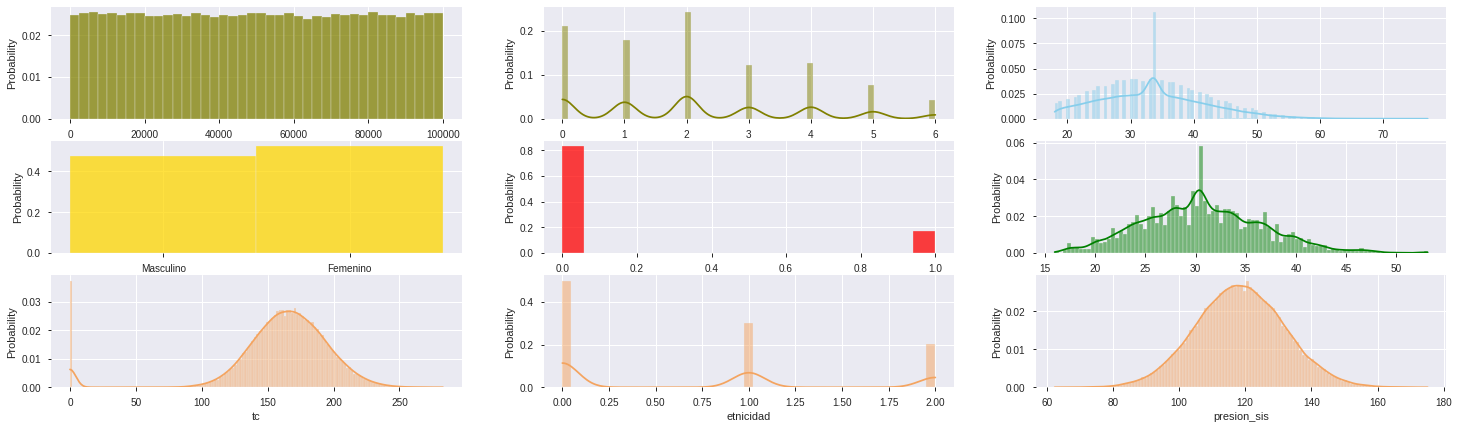

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(25, 7)) 
sns.histplot(data=df, x="id", color="olive", stat='probability', ax=axs[0,0])
sns.histplot(data=df, x="tazas_cafe", kde = True, color="olive", stat='probability', ax=axs[0,1])
sns.histplot(data=df, x="edad", kde=True, color="skyblue",stat='probability', ax=axs[0, 2])
sns.histplot(data=df, x="genero", color="gold", stat='probability', ax=axs[1,0])
sns.histplot(data=df, x="fumador", color="red", stat='probability', ax=axs[1,1])
sns.histplot(data=df, x="imc", kde = True, color="green", stat='probability', ax=axs[1,2])
sns.histplot(data=df, x="tc", kde = True, color="sandybrown", stat='probability', ax=axs[2,0])
sns.histplot(data=df, x="etnicidad", kde = True, color="sandybrown", stat='probability', ax=axs[2,1])
sns.histplot(data=df, x="presion_sis", kde = True, color="sandybrown", stat='probability', ax=axs[2,2])
plt.show()

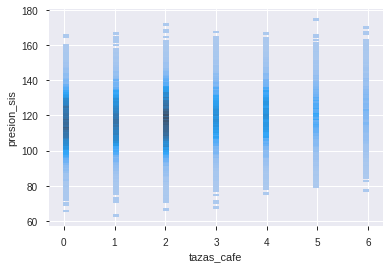

In [ ]:
sns.histplot(data=df, x="tazas_cafe", y="presion_sis", kde=True)
plt.show()

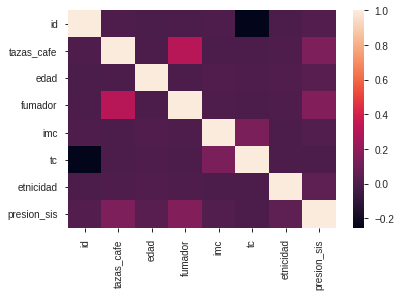

In [ ]:
#Realizar el gráfico de correlación
correlacion = df.corr()
sns.heatmap(correlacion, 
            xticklabels=correlacion.columns.values,
            yticklabels=correlacion.columns.values)
plt.show()

In [ ]:
df.corr()

,id,tazas_cafe,edad,fumador,imc,tc,etnicidad,presion_sis
id,1.000000,0.002617,-0.009386,-0.001064,0.003547,-0.255685,-0.003900,0.014560
tazas_cafe,0.002617,1.000000,-0.003719,0.308860,-0.003100,-0.002538,0.000394,0.141678
edad,-0.009386,-0.003719,1.000000,-0.001454,0.006951,0.000397,0.007035,0.030535
fumador,-0.001064,0.308860,-0.001454,1.000000,0.002769,-0.004973,0.000768,0.158437
imc,0.003547,-0.003100,0.006951,0.002769,1.000000,0.134002,-0.003416,0.011739
tc,-0.255685,-0.002538,0.000397,-0.004973,0.134002,1.000000,-0.005304,-0.004867
etnicidad,-0.003900,0.000394,0.007035,0.000768,-0.003416,-0.005304,1.000000,0.048882
presion_sis,0.014560,0.141678,0.030535,0.158437,0.011739,-0.004867,0.048882,1.000000


**3. [10%] A partir de visualizaciones bivariadas, responda ¿El alto consumo de café puede estar relacionado con una mayor presión sistólica? Identifique otros factores que pueden estar asociados con una mayor presión sistólica. Nota: La presión sistólica se considera normal hasta el valor de 120.**

De acuerdo a los histogramas la presion sistolica presenta una distribucion normal al igual el colesterol, y las tazas de cafe presentan una distribucion no uniforma, mas sin embargo para observar mas claramente la relacion de tazas de cafe se crea un mapa de calor, alli se puede observar que si existe una relacion de 0.141678 entre las tazas cafe y la presion sistolica pero es muy baja, mas sin embargo se puede resaltar en color rojo claro que existe una mayor relacion de 0.308860 etre un fumador y las tazas de cafe 


**Pruebas de hipótesis y correlación**

Primera hipotesis, se considera que la presion arterial no tiene ningun efecto sobre etnia o raza 

**H0** : No hay relacion entre la etnia y la presion arterial 

**H1** : Existe una relacion entre la etnia y la presion arterial


In [ ]:
def diagnostic(etnicidad):
    if etnicidad==0: val="blanco"
    elif etnicidad==1: val="negro"
    elif etnicidad==2: val="hispano"
    return val

In [ ]:
dpru['etnicidad']=dpru['etnicidad'].apply(diagnostic)
dpru = dpru[dpru['presion_sis'].notna()].reset_index()
dpru.head()

,index,id,tazas_cafe,edad,genero,fumador,imc,tc,etnicidad,presion_sis
0,0,63120,2.0,27.0,Masculino,0,35.600,164.540130,blanco,136.57
1,1,42957,1.0,69.0,Femenino,0,23.980,169.683363,blanco,116.48
2,2,39221,2.0,40.0,Femenino,0,22.610,113.783536,negro,118.85
3,3,42621,1.0,NaN,Masculino,1,39.995,210.724015,negro,139.42
4,4,26234,2.0,42.0,Masculino,0,35.860,162.950980,negro,124.94


In [ ]:
etnia_b =dpru[dpru['etnicidad']=='blanco']['presion_sis']
etnia_n =dpru[dpru['etnicidad']=='negro']['presion_sis']
etnia_h =dpru[dpru['etnicidad']=='hispano']['presion_sis']
print('media para raza blanca: '+str(etnia_b.mean()))
print('media para raza negra: '+str(etnia_n.mean()))
print('media para raza hispana: '+str(etnia_h.mean()))

media para raza blanca: 116.85127769716297
media para raza negra: 122.17221304814205
media para raza hispana: 116.91811698949557


In [ ]:
ttest,pval = ttest_ind(etnia_b,etnia_n)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: -56.256288266324574
Valor p: 0.0


In [ ]:
confianza=0.95
significancia=1-confianza
print("Significancia: ", significancia)
# Si se tiene menor valor se rechaza la hipótesis nula
if pval<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

Significancia:  0.050000000000000044
Rechazar hipótesis nula


**Pruebas de hipótesis y correlación**

Segunda hipotesis, se considera que fumar no influye sobre la presion arterial 

**H0** : No hay relacion entre la presion arterial y fumar 

**H1** : Existe una relacion entre la presion arterial y fumar

In [ ]:
def diagnostic(fumador):
    if fumador==0: val="si"
    elif fumador==1: val="no"
    return val

In [ ]:
dpru['fumador']=dpru['fumador'].apply(diagnostic)
dpru = dpru[dpru['presion_sis'].notna()].reset_index()
dpru.head()

,level_0,index,id,tazas_cafe,edad,genero,fumador,imc,tc,etnicidad,presion_sis
0,0,0,63120,2.0,27.0,Masculino,si,35.600,164.540130,blanco,136.57
1,1,1,42957,1.0,69.0,Femenino,si,23.980,169.683363,blanco,116.48
2,2,2,39221,2.0,40.0,Femenino,si,22.610,113.783536,negro,118.85
3,3,3,42621,1.0,NaN,Masculino,no,39.995,210.724015,negro,139.42
4,4,4,26234,2.0,42.0,Masculino,si,35.860,162.950980,negro,124.94


In [ ]:
si_fuma =dpru[dpru['fumador']=='si']['presion_sis']
no_fuma =dpru[dpru['fumador']=='no']['presion_sis']
print('media para fumadores: '+str(si_fuma.mean()))
print('media para no fumadores: '+str(no_fuma.mean()))

media para fumadores: 117.50322687121081
media para no fumadores: 123.15475694644215


In [ ]:
ttest,pval = ttest_ind(si_fuma,no_fuma)
print('Valor de t: '+str(ttest))
print('Valor p: '+ str(pval))

Valor de t: -51.465885240628104
Valor p: 0.0


In [ ]:
confianza=0.95
significancia=1-confianza
print("Significancia: ", significancia)
# Si se tiene menor valor se rechaza la hipótesis nula
if pval<significancia:
    print("Rechazar hipótesis nula")
else:
    print("No rechazar hipótesis nula")

Significancia:  0.050000000000000044
Rechazar hipótesis nula


**4. [15%] Analice dos factores que pueden estar relacionados con diferencias en el promedio de presión sistólica observado. Exprese la prueba de hipótesis y valídela usando pruebas por permutación o t-test. Escriba sus conclusiones de las pruebas.**


De acuerdo a los anteriores calculos se seleccionaron dos variables categoricas para identificar sus relaciones, la primera hipotesis busca identificar si la presion arterial tiene algun efecto sobre raza, encontrando por medio de la prueba t-test que la hipotesis nula se rechaza, esto indica que si hay una relacion entre la raza y la presion arterial (cabe aclarar que solo se midieron dos variables que corresponden a la raza blanca y negra, mas sin embargo por medio de anova es posibe hacer el calculo que incluya la raza hispana)

Para la segunda hipotesis por medio de otra prueba t-test se encontro que la hipotesis nula fue rechazada, lo que indica que fumar cigarrillo si tiene relacion directa con la presion arterial

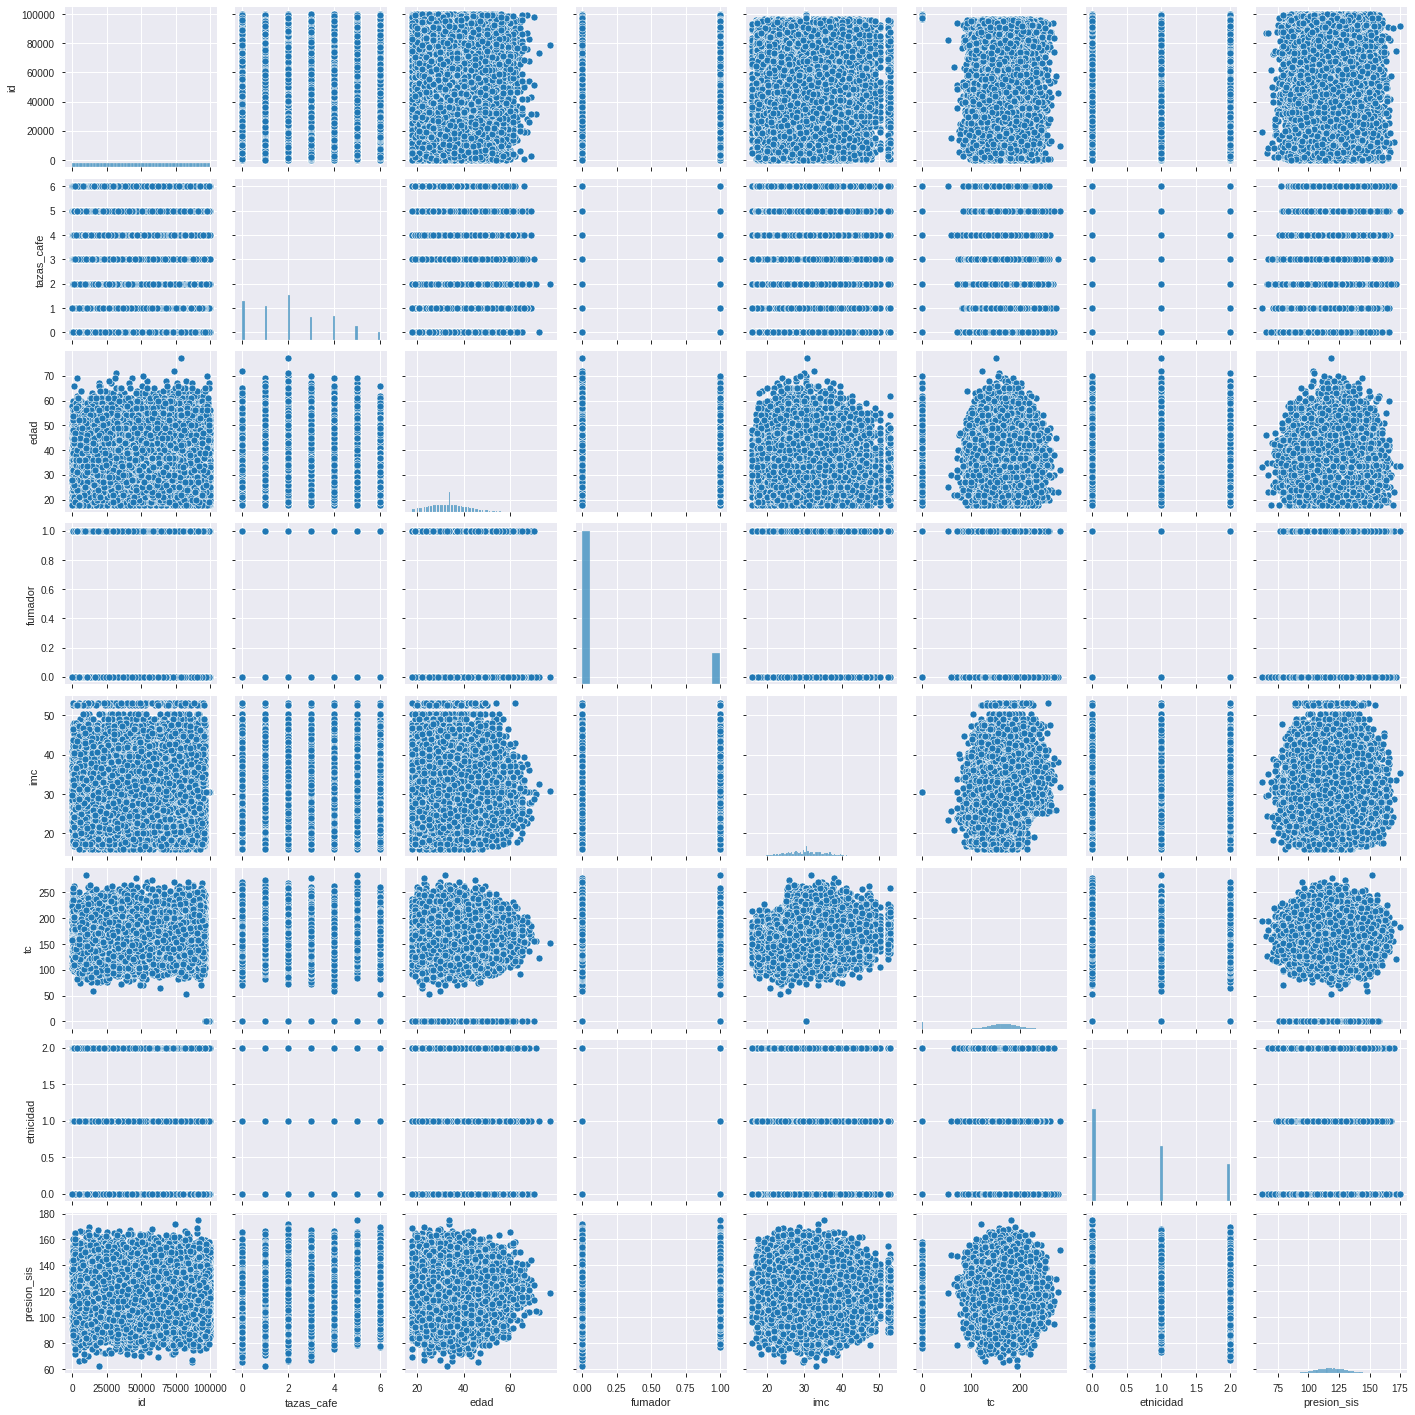

In [ ]:
sns.pairplot(df)

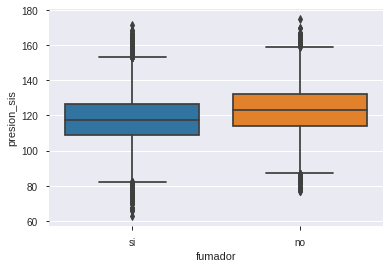

In [ ]:
sns.boxplot(data=dpru, x="fumador", y="presion_sis")

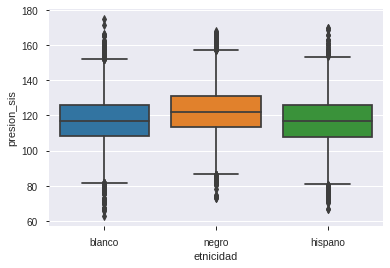

In [ ]:
sns.boxplot(data=dpru, x="etnicidad", y="presion_sis")

In [ ]:
def graph_corr(corr):
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

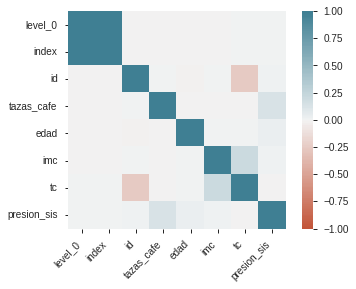

In [ ]:
corr = dpru.corr()
graph_corr(corr)

**5. [10%] Calcule y analice la correlación entre las variables y la presión sistólica. Escriba sus conclusiones al respecto. ¿Existen factores protectores? ¿Cuáles factores de riesgo puede descubrir?**

Para este analisis con las cajas y bigotes se puede observar que mas del 50% de los fumadores se encuentran dentro de un rango normal de presion, mientras que mas del 50% de los no fumadores presentan rangos de presion superiores a lo recomendado.

De acuerdo al analisis de cajas y bigotes de la etnicidad en comparacion la presion, se observa que las personas de raza negra son mas propensas a susperar los rango de presion arterial registrando una media de 122.17

Adicionalmente se puede observar que no hay factores protectores, por el contrario el colesterol esta asociado al imc (indice de masa corporal, y puede ser un factor de riesgo.

**6. [5%] ¿Existen problemas de multicolinealidad en los datos? ¿Cómo se pueden interpretar? ¿Qué problemas se pueden presentar en el análisis? ¿Cómo puede corregirlos? Sea específico con respecto al caso de estudio.**

De acuerdo a los valores observado, se puede afirmar que hay multicolinealidad de datos ya que la relacion lineal entre las variables varaibles explicativas no son fuertes, seria necesario hacer mayores ajustes de bondad a los datos ajustando los coeficientes para que se ajusten mejor a la recta y no se presenten tantos errores al momento de hacer una interpretacion para determinar el factor que mas afecta la presion arterial 

**Regresión Lineal**

In [ ]:
Y=df['presion_sis']
X=df.drop(['presion_sis','genero'], axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [ ]:
modelo_regresion = LinearRegression()
modelo_regresion

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo_regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train

,id,tazas_cafe,edad,fumador,imc,tc,etnicidad
47402,82995,2.0,49.000000,0,23.540,134.295598,0
36125,90834,3.0,25.000000,0,30.140,157.574829,2
46459,99372,3.0,33.000000,0,30.400,0.000000,0
64628,97140,2.0,38.000000,0,30.400,0.000000,0
81973,71064,0.0,46.000000,0,40.260,186.664748,0
...,...,...,...,...,...,...,...
61336,65803,4.0,35.000000,0,20.100,124.875323,0
74185,2003,1.0,36.426869,0,32.775,187.912106,0
55376,22274,1.0,23.000000,0,27.200,159.048637,0
57120,11018,2.0,28.000000,0,34.320,154.769781,0


In [ ]:
y_pred = modelo_regresion.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 13.11
MAE: 10.46
R²: 0.04


In [ ]:
y_pred = modelo_regresion.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 12.95
MAE: 10.35
R²: 0.04


In [ ]:
modelo_regresion.coef_

array([ 4.90272776e-06,  5.03495038e-02,  5.53731013e+00,  1.90742441e-02,
       -5.50405728e-04])

In [ ]:
modelo_regresion.intercept_

115.14522929792977

**7. [15%] ¿Existe una relación entre el número de tazas de café y la presión sistólica? Utilice una regresión lineal simple (con una sola variable dependiente) para responder esta pregunta. Analice el resultado, interpretando el intercepto y el coeficiente, las medidas de error y ajuste y haciendo una prueba de hipótesis sobre el coeficiente de la variable dependiente**

De acuerdo a los coeficientes de la regresion se hace nesesario ajustarlos o normalizarlos empleando tecnicas de lasso o ridga para observar facilmente las variables mas representativas, en el momento no se puede determinar la relacion, pero se considera que el error medio cuadratico es bajo y el R cuadrado es muy bajo, lo que nos da problemas de sesgo, varianza y ruido

In [ ]:
model = sm.OLS(Y, X).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            presion_sis   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          3.400e+05
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                        0.00
Time:                        02:51:54   Log-Likelihood:                     -2.8054e+05
No. Observations:               64064   AIC:                                  5.611e+05
Df Residuals:                   64057   BIC:                                  5.612e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
id             0.0002   2.57e-06     69.431      0.000       0.000       0.000
tazas_cafe     2.1028      0.046     45.783      0.000       2.013       2.193
edad           0.8854      0.008    113.269      0.000       0.870       0.901
fumador        4.8671      0.213     22.820      0.000       4.449       5.285
imc            1.3814      0.011    130.547      0.000       1.361       1.402
tc             0.1754      0.002    103.282      0.000       0.172       0.179
etnicidad      2.9247      0.097     30.212      0.000       2.735       3.114
==============================================================================
Omnibus:                       13.334   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.797
Skew:                          -0.017   Prob(JB):                      0.00166
Kurtosis:                       2.939   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**8. [25%] Teniendo en cuenta el análisis de los datos, realice una regresión lineal multivariable, intentando obtener una mayor medida de ajuste (R cuadrado). Puede realizar transformaciones a las variables, crear nuevas características y hacer selección de características. Justifique sus decisiones. Cuando seleccione un modelo, reporte el error sobre los datos de prueba.**

Modificacion de Parametros

In [ ]:
Y=df['presion_sis']
X=df.drop(['presion_sis','tazas_cafe','etnicidad','genero'], axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train

,id,edad,fumador,imc,tc
47402,82995,49.000000,0,23.540,134.295598
36125,90834,25.000000,0,30.140,157.574829
46459,99372,33.000000,0,30.400,0.000000
64628,97140,38.000000,0,30.400,0.000000
81973,71064,46.000000,0,40.260,186.664748
...,...,...,...,...,...
61336,65803,35.000000,0,20.100,124.875323
74185,2003,36.426869,0,32.775,187.912106
55376,22274,23.000000,0,27.200,159.048637
57120,11018,28.000000,0,34.320,154.769781


In [ ]:
modelo_regresion = LinearRegression()
modelo_regresion

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo_regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = modelo_regresion.predict(X_train)

print("MSE: %.2f" % mean_squared_error(Y_train, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_train, y_pred))
print('R²: %.2f' % r2_score(Y_train, y_pred))

MSE: 13.19
MAE: 10.53
R²: 0.03


**9. [5%] De acuerdo con su análisis, ¿qué recomendaciones podrían darse a las personas para reducir el riesgo de presión alta?**

De acuerdo a los datos observados y su comportamiento se puede concluir que la presion arterial presenta una leve relacion con los fumadores, el colesterol, por otra parte las tazas de cafe no afectan la tension